## Homography
Consider two images of a plane (top of the book) shown in Figure 1. The red dot represents the same physical point in the two images. In computer vision jargon we call these corresponding points. Figure 1. shows four corresponding points in four different colors — red, green, yellow and orange. A Homography is a transformation ( a 3×3 matrix ) that maps the points in one image to the corresponding points in the other image.

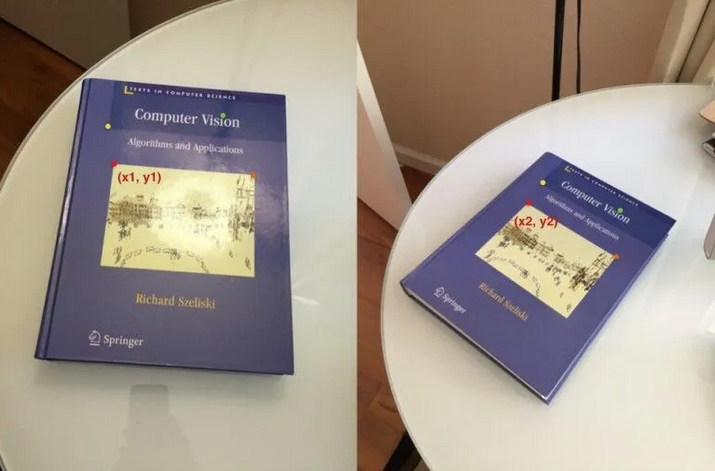

## Homography examples using OpenCV – Image Alignment
In other words you can apply the homography to the first image and the book in the first image will get aligned with the book in the second image! See Figure.

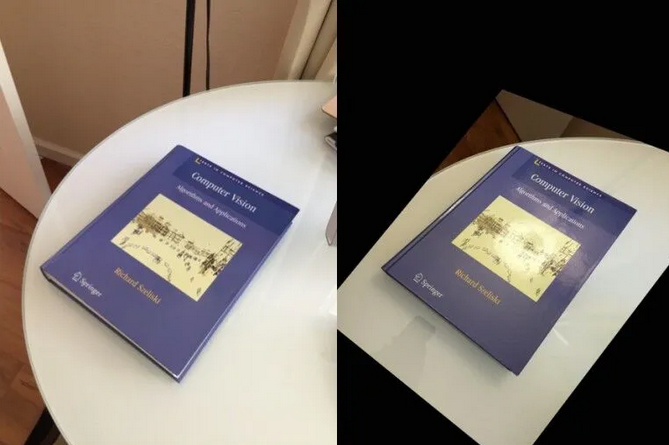

In [3]:
import numpy as np
import imutils
import cv2

## Read Image

In [4]:
def align_images(image, template, maxFeatures=500, keepPercent=0.2, debug=False):
    # convert both the input image and template to grayscale
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    # use ORB to detect keypoints and extract (binary) local
	# invariant features
    orb = cv2.ORB_create(maxFeatures)
    (kpsA, descsA) = orb.detectAndCompute(imageGray, None)
    (kpsB, descsB) = orb.detectAndCompute(templateGray, None)
    # match the features
    method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
    matcher = cv2.DescriptorMatcher_create(method)
    matches = matcher.match(descsA, descsB, None)
    # sort the matches by their distance (the smaller the distance,
	# the "more similar" the features are)
    matches = sorted(matches, key=lambda x:x.distance)
    # keep only the top matches
    keep = int(len(matches) * keepPercent)
    matches = matches[:keep]
    # check to see if we should visualize the matched keypoints
    if debug:
        matchedVis = cv2.drawMatches(image, kpsA, template, kpsB,
            matches, None)
        matchedVis = imutils.resize(matchedVis, width=1000)
        cv2.imshow("Matched Keypoints", matchedVis)
        cv2.waitKey(0)
        
    # allocate memory for the key-points (x, y)-coordinates from the
    # top matches -- we'll use these coordinates to compute our
    # homography matrix
    ptsA = np.zeros((len(matches), 2), dtype="float")
    ptsB = np.zeros((len(matches), 2), dtype="float")
    # loop over the top matches
    for (i, m) in enumerate(matches):
        # indicate that the two keypoints in the respective images
        # map to each other
        ptsA[i] = kpsA[m.queryIdx].pt
        ptsB[i] = kpsB[m.trainIdx].pt
        
    # compute the homography matrix between the two sets of matched
    # points
    (H, mask) = cv2.findHomography(ptsA, ptsB, method=cv2.RANSAC)
    # use the homography matrix to align the images
    (h, w) = template.shape[:2]
    aligned = cv2.warpPerspective(image, H, (w, h))
    # return the aligned image
    return aligned

In [5]:
# load the input image and template from disk
print("[INFO] loading images...")
img_path = "./images/doc.jpg"
template_path = "./images/template.png"

image = cv2.imread(img_path)
template = cv2.imread(template_path)

# align the images
print("[INFO] aligning images...")
aligned = align_images(image, template, debug=True)

[INFO] loading images...
[INFO] aligning images...


QObject::moveToThread: Current thread (0x2d2ce80) is not the object's thread (0x3b0acf0).
Cannot move to target thread (0x2d2ce80)

QObject::moveToThread: Current thread (0x2d2ce80) is not the object's thread (0x3b0acf0).
Cannot move to target thread (0x2d2ce80)

QObject::moveToThread: Current thread (0x2d2ce80) is not the object's thread (0x3b0acf0).
Cannot move to target thread (0x2d2ce80)

QObject::moveToThread: Current thread (0x2d2ce80) is not the object's thread (0x3b0acf0).
Cannot move to target thread (0x2d2ce80)

QObject::moveToThread: Current thread (0x2d2ce80) is not the object's thread (0x3b0acf0).
Cannot move to target thread (0x2d2ce80)

QObject::moveToThread: Current thread (0x2d2ce80) is not the object's thread (0x3b0acf0).
Cannot move to target thread (0x2d2ce80)

QObject::moveToThread: Current thread (0x2d2ce80) is not the object's thread (0x3b0acf0).
Cannot move to target thread (0x2d2ce80)

QObject::moveToThread: Current thread (0x2d2ce80) is not the object's thread

: 